# 基于pandas的双变量的作图
1. Scatter plot --> df.plot.scatter() 
    + 擅长: 区间数据、一些无序的分类数据
2. Hex plot --> df.plot.hex() 
    + 擅长: 区间数据、一些无序的分类数据
3. Stacked Bar Chart --> df.plot.bar(stacked=True) 
    + 擅长: 有序和无序的分类数据
4. Bivarite Line Char --> df.plot.line() 
    + 擅长: 有序的分类数据和区间数据

没有数据关系的数据是空白的无意义的。为了能画出以上的图形，我们需要理解两个变量之间是如何交互的。    
是否同时增减，是否存在线性关系，为了更好的看出这些关系，我们最好从图形上来观察。


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
df_reviews = pd.read_csv('../dataSet/winemag-data_first150k.csv',index_col=0)

df_reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# Scatter plot 
散点图是最简单的表示两个变量的图形。散点图能够很好的将两个变量的关系映射到二维空间上。



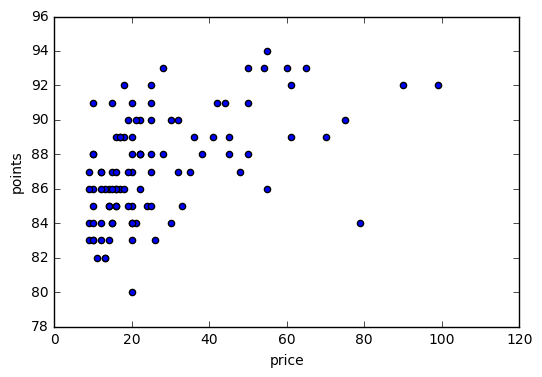

In [4]:
df_reviews[df_reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

为了能更好的表示出这个图片，我们使用抽样的方式，抽取出100个点进行散点图显示。这是因为散点图不能表示映射到同一个点的多个点，
例如有10个(100,80)的点，在图上只能显示一个点。如果我们不使用抽样，你看到的图中会全是点，基本看不出来模式。如下图显示：


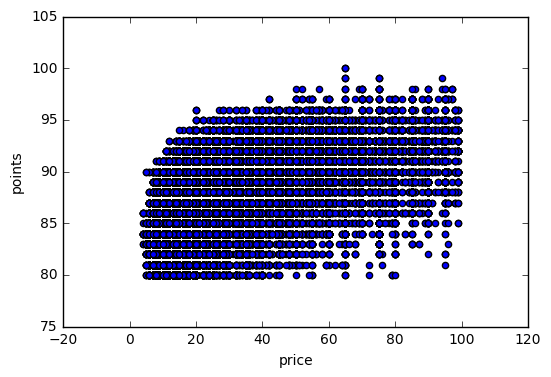

In [5]:
df_reviews[df_reviews['price']<100].plot.scatter(x='price',y='points')


如上图显示的一样，为了解决这个问题，我们已经提出一个抽样的方法，这里使用我们可以使用另一种作图方式，hexplot

# Hexplot
hexplot将所有的点放到六边形内，并且对不同的图形使用不同的颜色程度就行着色。


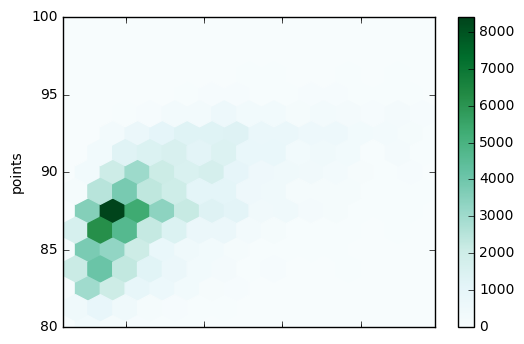

In [9]:
# gridsize： 表示每个六边形的个数，这里选择有15个
df_reviews[df_reviews['price']<100].plot.hexbin(x='price',y='points', gridsize=15)



通过前两个图，我们可以看到，散点图可以很好的比较两个变量之间的关系，但是hexplot的图的显示，使得我们不能很好的理解。
从上面的图中，我们能够看到的是，评分87.5的酒大概20美元一瓶。

# Stacked plots
这一章我们新引入了两个图形表示，scatter和hexplot。接着回顾一下上一节提到的几个plot。我们通过使用参数stacking，使其能展示不仅仅一个变量的图形，一个stack图是一个变量在另一个变量头上的显示。下面我们使用另一组数据来演示这个plot。



In [15]:
df_wine_counts = pd.read_csv('../dataSet/top-five-wine-score-counts.csv',index_col=0) # 不包含第一行索引
 

In [14]:
df_wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


正如上面的表格所示，是pandas数据的一个普遍现象。列表示一个类别变量，行表示另一个类别变量，他们交叉点表示计数。    
我们首先从bar图的stack开始显示。

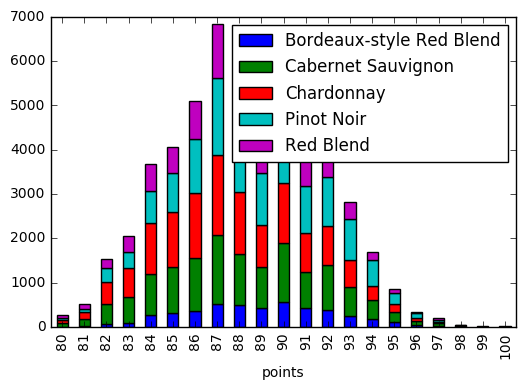

In [17]:
df_wine_counts.plot.bar(stacked=True)

stacked bar图显示单变量bar图的优点和缺点。它可以在无序的和小的有序的类别变量上工作的很好。    
下面是另一个stack例子，area plot.它不会使用参数，就会自动进行处理。


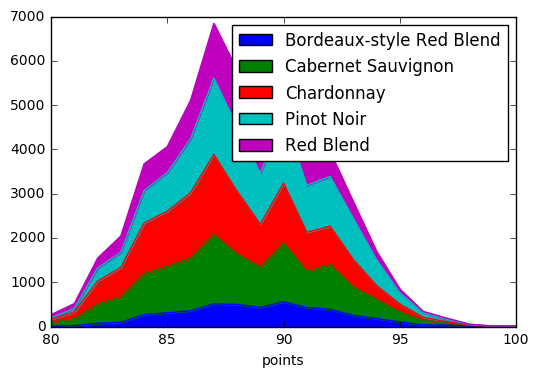

In [18]:
df_wine_counts.plot.area()